In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/NLP @ X-HEC - 2K23/Cours 2 - Cleaning/2. Notebooks/")

In [ ]:
!pwd
!ls

/content/drive/.shortcut-targets-by-id/1gy0IkYmgkKj2wGzR4qKdvEgeiSsk57cs/NLP @ X-HEC - 2K23/Cours 2 - Cleaning/2. Notebooks
data  ex_cleaning_session_2.ipynb


In [ ]:
!pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=8a3808929fb1d74aeb6c3e0d5e2d01f116cc77dbc93f03942f71efb8876b8460
  Stored in directory: /root/.cache/pip/wheels/eb/03/0d/3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words


In [ ]:
import pandas as pd 
import numpy as np 
import gc
import os
from string import punctuation
from stop_words import get_stop_words
import nltk
from nltk import word_tokenize
from nltk import WordNetLemmatizer
import seaborn 
import matplotlib.pyplot as plt

DATAPATH = "./data/"

nltk.download("stopwords")
nltk.download('punkt')
nltk.download("wordnet")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Load Data

In [ ]:
# Try to name your data / dataframe explicitly. 
scrapped_data = pd.read_json(DATAPATH+'fournisseurs_energie_top5_forums.json')
scrapped_data.sample(3)

,fournisseur,page,source,date,text
21558,happ-e,66,avis_verifies,2022-07-17,Rien à dire tout est parfait
36876,edfenr,467,avis_verifies,2022-01-03,Très bon contact. J attend le rendez-vous avec...
4534,eni,17,trustpilot,2020-12-02,On est venu me faire souscrire à un contrat en...


In [ ]:
scrapped_data.shape

(37266, 5)

In [ ]:
# Take only a limited number of our reviews to increase speed / reduce process time
scrapped_data = scrapped_data.sample(30000)
# scrapped_data = scrapped_data.sample(frac=0.1)

In [ ]:
df = scrapped_data

In [ ]:
df.head()

,fournisseur,page,source,date,text
18894,totalenergies,230,avis_verifies,2022-05-10,Facilité de la souscription qui s'est faite en...
26021,totalenergies,114,avis_verifies,2021-07-25,"Aucune compétence, personnnel pas formé"
6879,totalenergies,94,trustpilot,2021-08-25,Très satisfait
9622,totalenergies,232,trustpilot,2019-09-02,Total direct énergie facture 63m3 en trop à un...
5408,totalenergies,21,trustpilot,2022-07-24,Je suis satisfait de l'entretien eu par téléph...


## Explore Data

In [ ]:
# use describe(), info() functions, check column types

In [ ]:
df.describe()

,page
count,30000.000000
mean,175.007700
std,152.448278
min,1.000000
25%,49.000000
50%,129.000000
75%,264.000000
max,643.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 3109 to 32095
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fournisseur  30000 non-null  object        
 1   page         30000 non-null  int64         
 2   source       30000 non-null  object        
 3   date         29329 non-null  datetime64[ns]
 4   text         30000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.4+ MB


## Feature Engineering

In [ ]:
# convert types
#scrapped_data['date'] = 
scrapped_data['page'] = scrapped_data['page'].astype(str)

## Some visualisations

In [ ]:
# Import useful visualisation librairies
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


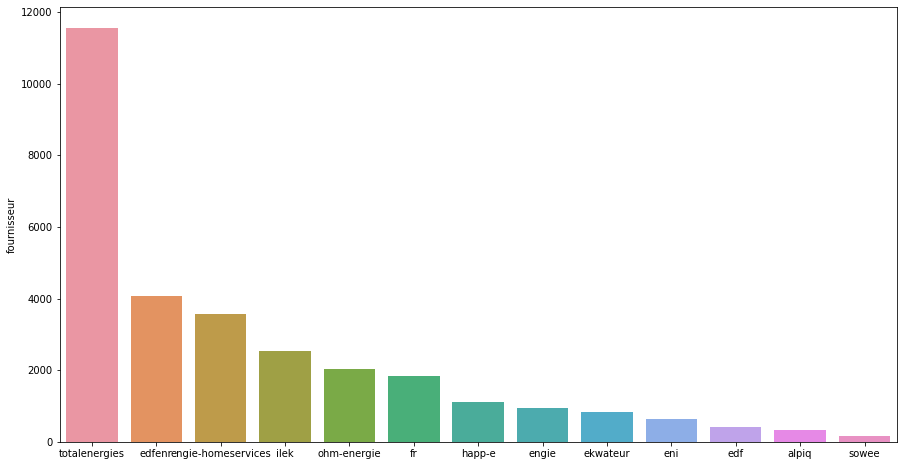

In [ ]:
# Number of comment by brand, by model (marque, sous-marque)
plt.figure(figsize = (15,8))
sns.barplot(df['fournisseur'].value_counts().index, df['fournisseur'].value_counts()) 

#after value_counts()

In [ ]:
# Distribution of date, number of words

In [ ]:
# dive into outliers (number of words by comments, number of comments by posts, old dates...)

# Work on reviews

## Preprocessing

In [ ]:
# lower case
df["text"] = df["text"].str.lower()

In [ ]:
df["text"]

176             souscription via le site: facile et rapide
21788                                         très simple.
32157    le technicien qui est passé chez moi était trè...
31397               personne aimable et m’a bien conseillé
24555    une demarche tres simple et tres bien explique...
                               ...                        
16868    j'ai économisé beaucoup depuis que je suis che...
4264     bonjour, je confirme tous les avis négatifs de...
10622    electricité vert plus une bonne service client...
14962    client depuis 1 mois, mise en place contrat fa...
35706                      professionnalisme et efficacité
Name: text, Length: 30000, dtype: object

In [ ]:
# remove punctuation
from string import punctuation
df["text"] = df["text"].str.translate(str.maketrans('', '', string.punctuation))

In [ ]:
df["text"]

176              souscription via le site facile et rapide
21788                                          très simple
32157    le technicien qui est passé chez moi était trè...
31397               personne aimable et m’a bien conseillé
24555    une demarche tres simple et tres bien explique...
                               ...                        
16868    jai économisé beaucoup depuis que je suis chez...
4264     bonjour je confirme tous les avis négatifs de ...
10622    electricité vert plus une bonne service client...
14962    client depuis 1 mois mise en place contrat fac...
35706                      professionnalisme et efficacité
Name: text, Length: 30000, dtype: object

In [ ]:
# remove accent
! pip install Unidecode
from unidecode import unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df["text"] = df["text"].apply(unidecode)

In [ ]:
df["text"]

176              souscription via le site facile et rapide
21788                                          tres simple
32157    le technicien qui est passe chez moi etait tre...
31397               personne aimable et m'a bien conseille
24555    une demarche tres simple et tres bien explique...
                               ...                        
16868    jai economise beaucoup depuis que je suis chez...
4264     bonjour je confirme tous les avis negatifs de ...
10622    electricite vert plus une bonne service client...
14962    client depuis 1 mois mise en place contrat fac...
35706                      professionnalisme et efficacite
Name: text, Length: 30000, dtype: object

In [ ]:
# remove special characters
df["text"] = df["text"].str.replace('\W', '', regex=False)

In [ ]:
df["text"][25435]

'reactivite impeccable '

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
# tokenization
# Using NLP libraries 
df["text"] = df["text"].apply(word_tokenize)


In [ ]:
df["text"]

176      [souscription, via, le, site, facile, et, rapide]
21788                                       [tres, simple]
32157    [le, technicien, qui, est, passe, chez, moi, e...
31397    [personne, aimable, et, m, ', a, bien, conseille]
24555    [une, demarche, tres, simple, et, tres, bien, ...
                               ...                        
16868    [jai, economise, beaucoup, depuis, que, je, su...
4264     [bonjour, je, confirme, tous, les, avis, negat...
10622    [electricite, vert, plus, une, bonne, service,...
14962    [client, depuis, 1, mois, mise, en, place, con...
35706                  [professionnalisme, et, efficacite]
Name: text, Length: 30000, dtype: object

In [ ]:
# remove stopwords
import nltk
from nltk.corpus import stopwords

stop_words_fr = stopwords.words("french")
df["text"] = [[token for token in sentence if token not in stop_words_fr] for sentence in df["text"]]

In [ ]:
df["text"]

176              [souscription, via, site, facile, rapide]
21788                                       [tres, simple]
32157    [technicien, passe, chez, etait, tres, sympath...
31397           [personne, aimable, ', a, bien, conseille]
24555    [demarche, tres, simple, tres, bien, explique,...
                               ...                        
16868    [jai, economise, beaucoup, depuis, chez, total...
4264     [bonjour, confirme, tous, avis, negatifs, four...
10622    [electricite, vert, plus, bonne, service, clie...
14962    [client, depuis, 1, mois, mise, place, contrat...
35706                      [professionnalisme, efficacite]
Name: text, Length: 30000, dtype: object

In [ ]:
# Homework function #1 
def basic_cleaning(corpus):
    # lower case
    corpus_lower_case = df["text"].str.lower() 

    # remove punctuation
    corpus_without_punct = corpus_lower_case.str.translate(str.maketrans('', '', string.punctuation))

    #remove accent
    corpus_without_acc = corpus_without_punct.apply(unidecode)

    # remove special characters
    corpus_withoout_ch = corpus_without_acc.str.replace('\W', '', regex=False)

    #tokenization 
    tokenized_corpus = corpus_withoout_ch.apply(word_tokenize)

    # remove stopwords
    stop_words_fr = stopwords.words("french")
    corpus_without_stopw = [[token for token in sentence if token not in stop_words_fr] for sentence in dtokenized_corpus]

    corpus = corpus_without_stopw 

    return corpus

In [ ]:
# try ngrams

In [ ]:
import re
from nltk.util import ngrams

n = 3
list = []
#len = len(df["text"])

for i in range(0, 3):
  n_grams = ngrams(df["text"][i].split(), n)
  for gram in n_grams:
    list.append(gram)
  df["text"][i] = list


<ipython-input-79-69c7831140f0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"][i] = list


KeyError: ignored

## Tests of some stemmers

In [ ]:
from nltk.stem.snowball import FrenchStemmer
french_stemmer = FrenchStemmer()
french_stemmer.stem("avions")

In [ ]:
def stem_review(tokens):

    return tokens

## Lemmatize

In [ ]:
pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git

In [ ]:
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
lemmatizer = FrenchLefffLemmatizer()
lemmatizer.lemmatize('avions')

In [ ]:
def lemmatize_review(tokens):

    return tokens

# TFIDF / BOW

In [ ]:
# You can use your own function to vectorize (TF or TF-IDF), but it is recommened to use libraries when possible.
# It is way more scalable and lot of functionnalities are implemented

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize


In [ ]:
# Try different parameters for TfidfVectorizer, bigrams...

# WordClouds

In [ ]:
from wordcloud import WordCloud
from PIL import Image

#You can add a mask to your wordcloud so that it has a shape related to the topic.  
car_mask = np.array(Image.open(DATAPATH+"cars.jpg"))

## Function from corpus to wordcloud

In [ ]:
# Homework function 2 
def from_corpus_to_word_cloud(text_column):
    
    return 

# Be Creative ! 